<a href="https://colab.research.google.com/github/Piyusha1211/MEC_20F20679/blob/main/Face_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install face-recognition==1.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=a5083007bd8ebcf17bd7f5a70505b7951e6b433c015d4cc3318df6a25cb2cfa9
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install opencv-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras-vggface
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#base libraries for data handling
import os
import sys
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# consistent plots #
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [ ]:
#load the data -- > .npz format
data = np.load('/content/ORL_faces.npz')

In [ ]:
#check the type of the data
type(data)

numpy.lib.npyio.NpzFile

In [ ]:
#check the content of the files in a sorted fashion.. 
sorted(data.files)

['testX', 'testY', 'trainX', 'trainY']

In [ ]:
#view the content of the npzfiles
data['trainX']

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [ ]:
data['trainY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [ ]:
#check the type of the data -- > confirm it is numpy array
type(data['trainX']), type(data['trainY'])

(numpy.ndarray, numpy.ndarray)

In [ ]:
#check the shape of the data
data['trainX'].shape, data['trainY'].shape

((240, 10304), (240,))

In [ ]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

#trainX = data['trainX']
#testX = data['testX']

#trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['trainX']))))/255.
#testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['testX']))))/255.

#trainX =  np.reshape(trainX,newshape=(trainX.shape[0],n_rows,n_cols,3))
#testX =  np.reshape(testX,newshape=(testX.shape[0],n_rows,n_cols,3))

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols))

trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(trainX))))/255.
testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(testX))))/255.


trainY = data['trainY']
testY = data['testY']

In [ ]:
#check the new shape
trainX.shape, testX.shape

((240, 112, 92, 3), (160, 112, 92, 3))

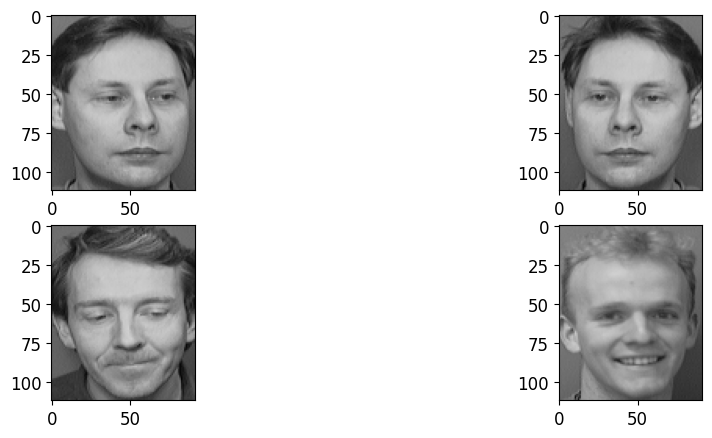

In [ ]:
#lets visualize random images
delta = 5
n = np.random.randint(low=0,high=trainX.shape[0]- 2*delta,dtype=int)

#plot the faces 
plt.subplot(2,2,1)
plt.imshow(trainX[n])
plt.subplot(2,2,2)
plt.imshow(trainX[n+delta])
plt.subplot(2,2,3)
plt.imshow(trainX[n-delta])
plt.subplot(2,2,4)
plt.imshow(trainX[n+delta*2])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,random_state=seed,test_size=test_size)

In [ ]:
#shape post split of data
X_train.shape, X_valid.shape

((216, 112, 92, 3), (24, 112, 92, 3))

In [ ]:
#for consitency in the variable names
X_test = testX

In [ ]:
y_test = testY

In [ ]:
y_train[0]

4

In [ ]:
!pip install keras_facenet
from keras_facenet import FaceNet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.6 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=bc3aa1a44e308063a0be4cc0c4bc95ac46e650a0d4f685c2af03fac00ba816ab
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


In [ ]:
#load the pretrained facenet model
from keras.models import load_model
from numpy import asarray
from numpy import expand_dims

model =  FaceNet()

In [ ]:
#repeat the same color channels 3 times to make the shape compatible with the facenet model
#X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
#X_valid = np.repeat(X_valid[..., np.newaxis], 3, -1)
#X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [ ]:
X_train.shape

(216, 112, 92, 3)

In [ ]:
#resize the array to make it compatible with facenet. 
X_train = np.resize(X_train,(X_train.shape[0],160,160,3))
X_valid = np.resize(X_train,(X_valid.shape[0],160,160,3))
X_test = np.resize(X_train,(X_test.shape[0],160,160,3))

In [ ]:
#check the new shapes after array resize
X_train.shape, X_valid.shape, X_test.shape

((216, 160, 160, 3), (24, 160, 160, 3), (160, 160, 160, 3))

In [ ]:
#scale the inputs
#X_train = X_train / 255.
#X_valid = X_valid / 255.
#X_test = X_test / 255.

In [ ]:
#use the pretrained model to generate the embeddings 
y_train_embeddings = model.embeddings(X_train)
y_valid_embeddings = model.embeddings(X_valid)
y_test_embeddings = model.embeddings(X_test)

5/5 [==============================] - 9s 2s/step


In [ ]:
#check the shape of the embeddings of the images in the training set 
y_train_embeddings.shape

(216, 512)

In [ ]:
#apply the L2 norm on the generated embeddings using facenet model
from sklearn.preprocessing import Normalizer
input_encoder = Normalizer(norm='l2')
embed_train_norm = input_encoder.transform(np.reshape(y_train_embeddings,(-1,128)))
embed_valid_norm = input_encoder.transform(np.reshape(y_valid_embeddings,(-1,128)))
embed_test_norm = input_encoder.transform(np.reshape(y_test_embeddings,(-1,128)))

In [ ]:
#check the shape post normalization 
embed_train_norm.shape

(864, 128)

In [ ]:
#import the needed libraries and metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [ ]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

OSError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [ ]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols,n_channels))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols,n_channels))
trainY = data['trainY']
testY = data['testY']

In [ ]:
#train the model on the entire train data after shuffling the dataset 
shuffled_indices = np.random.permutation(len(trainX))
X_train = trainX[shuffled_indices]
y_train = trainY[shuffled_indices]

In [ ]:
#optional familiar variable naming 
X_test = testX
y_test = testY

In [ ]:
#tensorflow
import tensorflow as tf

In [ ]:
def convolutional_model(input_shape, n_filters=8, kernel_size=4, strides=1, padding='same', units=1024, activation='relu',
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)):
    
    '''CNN and Dense Model using Functional API'''
    
    input_img = tf.keras.Input(shape=input_shape[1:])
    
    # Conv2D layer with batch normalization and activation
    Z1 = tf.keras.layers.Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), strides=strides, padding=padding)(input_img)
    A1 = tf.keras.layers.BatchNormalization()(Z1)
    A1 = tf.keras.layers.Activation(activation)(A1)
    
    # MaxPooling2D
    P1 = tf.keras.layers.MaxPool2D(pool_size=(n_filters, n_filters), strides=strides*8, padding=padding)(A1)
    
    # Conv2D layer with batch normalization and activation
    Z2 = tf.keras.layers.Conv2D(filters=n_filters*2, kernel_size=(int(kernel_size/2), int(kernel_size/2)), strides=strides, padding=padding)(P1)
    A2 = tf.keras.layers.BatchNormalization()(Z2)
    A2 = tf.keras.layers.Activation(activation)(A2)
    
    # MaxPooling2D
    P2 = tf.keras.layers.MaxPool2D(pool_size=(int(n_filters/2), int(n_filters/2)), strides=strides*4, padding=padding)(A2)
    
    # Flatten
    F = tf.keras.layers.Flatten()(P2)
    
    # Dense layers with batch normalization and activation
    D1 = tf.keras.layers.Dense(units=units)(F)
    D1 = tf.keras.layers.BatchNormalization()(D1)
    D1 = tf.keras.layers.Activation(activation)(D1)
    
    D2 = tf.keras.layers.Dense(units=int(units/2), activation=activation, kernel_regularizer=kernel_regularizer)(D1)
    D3 = tf.keras.layers.Dense(units=int(units/4), activation=activation, kernel_regularizer=kernel_regularizer)(D2)
    
    # Output layer
    outputs = tf.keras.layers.Dense(units=20, activation='softmax')(D3)
    
    # Instantiate the model
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
#set the shape and the regularizer to be applied
INPUT_SHAPE = (X_train.shape[0],112,92,1)
kernel_regularizer = tf.keras.regularizers.L2(l2=0.05)

#call the convolutional model 
conv_model = convolutional_model(input_shape=INPUT_SHAPE,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                                kernel_regularizer=kernel_regularizer)
#compile the model
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 92, 1)]      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 92, 8)        136       
                                                                 
 batch_normalization (BatchN  (None, 112, 92, 8)       32        
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 112, 92, 8)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 12, 16)        528   

In [ ]:
class MyQualityThreshold(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyQualityThreshold, self).__init__()
        self.cl = cl
  
    def on_epoch_end(self,epoch,logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']

        if testScore > self.cl:
              self.model.stop_training=True

In [ ]:
#fit the model
history = conv_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=2,
                        callbacks=[MyQualityThreshold(0.92)],batch_size=32)

Epoch 1/100
8/8 - 4s - loss: 48.7822 - accuracy: 0.4875 - val_loss: 54.7487 - val_accuracy: 0.0500 - 4s/epoch - 466ms/step
Epoch 2/100
8/8 - 2s - loss: 36.3534 - accuracy: 0.9750 - val_loss: 42.3326 - val_accuracy: 0.0500 - 2s/epoch - 190ms/step
Epoch 3/100
8/8 - 1s - loss: 26.7688 - accuracy: 0.9958 - val_loss: 33.7687 - val_accuracy: 0.0500 - 1s/epoch - 185ms/step
Epoch 4/100
8/8 - 2s - loss: 19.0696 - accuracy: 1.0000 - val_loss: 24.2077 - val_accuracy: 0.0500 - 2s/epoch - 255ms/step
Epoch 5/100
8/8 - 2s - loss: 13.2717 - accuracy: 1.0000 - val_loss: 16.3414 - val_accuracy: 0.0500 - 2s/epoch - 277ms/step
Epoch 6/100
8/8 - 1s - loss: 9.2031 - accuracy: 0.9958 - val_loss: 12.9151 - val_accuracy: 0.0500 - 1s/epoch - 180ms/step
Epoch 7/100
8/8 - 1s - loss: 6.3991 - accuracy: 1.0000 - val_loss: 9.4216 - val_accuracy: 0.0500 - 1s/epoch - 187ms/step
Epoch 8/100
8/8 - 1s - loss: 4.5130 - accuracy: 1.0000 - val_loss: 8.1860 - val_accuracy: 0.0938 - 1s/epoch - 185ms/step
Epoch 9/100
8/8 - 2s 

In [ ]:
#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,48.782154,0.487500,54.748718,0.05
1,36.353439,0.975000,42.332600,0.05
2,26.768803,0.995833,33.768650,0.05
3,19.069580,1.000000,24.207676,0.05
4,13.271729,1.000000,16.341402,0.05


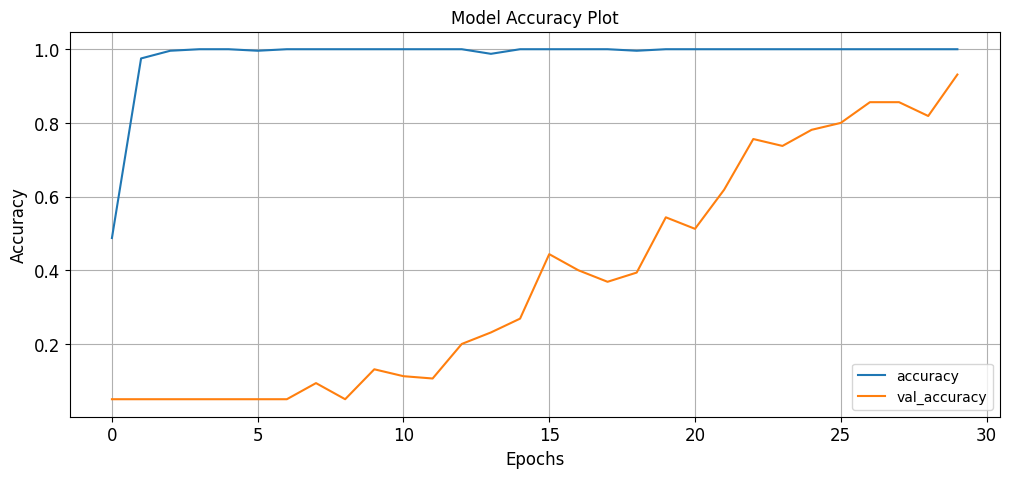

In [ ]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

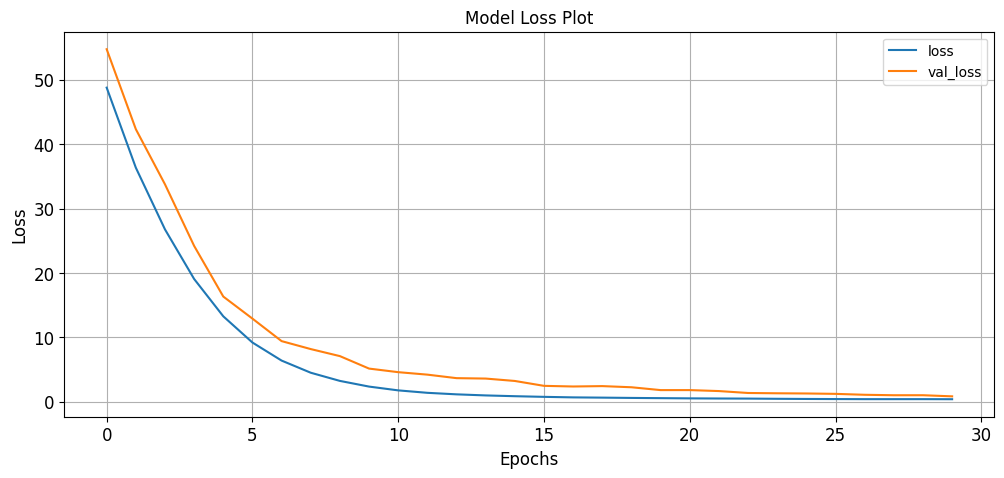

In [ ]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()